# 3.b {-}

**Attached is the file noisy_bits.csv which contains a $500 \times 10$ matrix. Each row of the matrix is a sample of $X$. If you look at an image of the matrix (in R use image on the transposed matrix), you will see that there are two patterns, but with some noise added. Use your EM algorithm to fit the mixture model to the data. Does your fit recover the two underlying patterns?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("noisy_bits.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,1,1,1,0,1,0,1,0,0,1
1,1,0,0,1,1,0,0,1,0,0
2,1,1,1,1,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0
4,1,0,1,1,1,0,0,0,0,0


In [3]:
X = data.to_numpy()
X.shape

(500, 10)

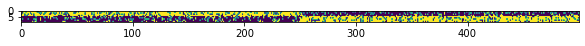

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(X.T)
plt.show()

In [5]:
N, n = X.shape[0], X.shape[1]

Let's create a function that gives us $P(Z^{(i)}_1=1|\theta')$ for any given $\theta'.$

In [6]:
def p(mu1, mu2, p1):
    num = p1*np.prod(mu1**X*(1-mu1)**(1-X), axis=1)
    den = num + (1-p1)*np.prod(mu2**X*(1-mu2)**(1-X), axis=1)
    return num/den

In [7]:
def logl(mu1, mu2, p1):
    probs = p(mu1, mu2, p1)
    a = probs.dot(X.dot(np.log(mu1))+(1-X).dot(np.log(1-mu1))+np.log(p1))
    b = (1-probs).dot(X.dot(np.log(mu2))+(1-X).dot(np.log(1-mu2))+np.log(1-p1))
    return a+b
    

In [8]:
def EM(mu1, mu2, p1):
    """EM algorithm
    
    Args:
        mu1: vector of size (10,)
        mu2: vector of size (10,) 
        p1: scalar
        
    Returns:
        A list with the following elements:
            mu1: vector of size (10,)
            mu2: vector of size (10,) 
            p1: scalar
            
        
    """
    probs = p(mu1, mu2, p1)
    mu1 = probs.dot(X)/sum(probs)
    mu2 = (1-probs).dot(X)/sum(1-probs)
    p1 = sum(probs)/N
    
    return [mu1, mu2, p1]
    
    
def EM_function(theta, eps=10**-4):
    """Function that runs the EM algorithm
    
    Args:
        theta: A list with the following elements:
            mu1: vector of size (10,)
            mu2: vector of size (10,) 
            p1: scalar
        
    Returns:
            1. theta: A list with the following elements
                mu1: vector of size (10,)
                mu2: vector of size (10,) 
                p1: scalar
            2. logs: a list with the log likelihood value of each iteration i
    
    """
    
    l = np.Inf
    logs = []
    while(abs(l - logl(*EM(*theta))) > eps):
        theta = EM(*theta) 
        l = logl(*theta)
        logs.append(l)
    return theta, logs

In [9]:
# Use KMeans to initialize the parameter vector theta
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X)
centers = model.cluster_centers_

theta_start = [centers[0], centers[1], 0.2]

In [10]:
theta, logs = EM_function(theta_start)

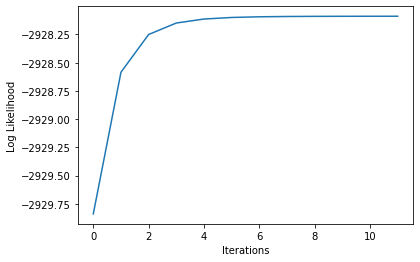

In [11]:
plt.plot(logs)
plt.xlabel("Iterations")
plt.ylabel("Log Likelihood")
plt.show()

$\mu_1:$

In [12]:
theta[0]

array([0.80896481, 0.78512506, 0.78081163, 0.76835602, 0.77582801,
       0.2793406 , 0.20532695, 0.20609471, 0.20782407, 0.18556576])

$\mu_2$

In [13]:
theta[1]

array([0.22500748, 0.22105249, 0.21737246, 0.16137866, 0.23862691,
       0.8141801 , 0.79273639, 0.81216121, 0.75381171, 0.79270119])

$p_1:$

In [14]:
theta[2]

0.5051610828757628

Yes, the trend has been uncovered. From make_noisy_bits.R we can see that the first half of the datapoints ($250$ datapoints) were created as $<1,1,1,1,1,0,0,0,0,0>$ with $80\%$ probability and $<0,0,0,0,0,1,1,1,1,1>$ otherwise. Note how $\mu_1$ has approx. $0.8$ as the expected mean for the first five coordinates and approx. $0.2$ for the last five.

Similarly, the second half ($250$ datapoints) were created as $<0,0,0,0,0,1,1,1,1,1>$ with $80\%$ probability and $<1,1,1,1,1,0,0,0,0,0>$ otherwise. Note how $\mu_2$ has approx. $0.2$ as the expected mean for the first five coordinates and approx. $0.8$ for the last five.

Finally, note how $p_1$ is approx. $0.5$ -- agreeing with the $50$/$50$ split.